In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

mpl.rcParams['figure.dpi'] = 300

In [2]:
def plot_validation(result_in_situ, result_image, title, plot_save_path, are_big_markers=False):
   r2 = r2_score(result_in_situ, result_image)

   df_in_situ = result_in_situ.to_frame()
   df_image = result_image.to_frame()
   regressor = LinearRegression().fit(df_in_situ, df_image)
   
   f, ax = plt.subplots()

   if (are_big_markers):
      s=50
   else:
      s=10

   plt.scatter(
      df_in_situ, 
      df_image,
      s=s,
      color='#6495ED',
      marker=".",
      label="Температура"
      )

   plt.plot(
      df_in_situ,
      regressor.predict(df_in_situ),
      linewidth=1.5,
      color='black',
      label="Линейная регрессия"
   )
   
   plt.xlabel(r"Наземные измерения, ${\degree}C$")
   plt.ylabel(r"Предсказанная температура, ${\degree}C$")
   # plt.legend(loc="upper left")
   plt.title(title)
   plt.text(
      x=0.845,
      y=0.12,
      s=f"y = {regressor.coef_[0][0]:.2f}x + {regressor.intercept_[0]:.2f}\n$R^{{2}} = {r2:.2f}$",
      horizontalalignment='center',
      verticalalignment='top',
      transform = ax.transAxes,
      bbox=dict(facecolor='white', alpha=0.2))

   plt.savefig(plot_save_path)

In [3]:
def plot_validation_multiple(results_in_situ, results_image, colors, names, title, plot_save_path):
   for (i, (result_in_situ, result_image, name)) in enumerate(zip(results_in_situ, results_image, names)):
      df_in_situ = result_in_situ.to_frame()
      df_image = result_image.to_frame()
      regressor = LinearRegression().fit(df_in_situ, df_image)

      plt.scatter(
         df_in_situ, 
         df_image,
         s=10,
         color=colors(i, alpha=0.4),
         marker=".",
         # label=f"Температура {name}"
         )

      plt.plot(
         df_in_situ,
         regressor.predict(df_in_situ),
         linewidth=1.5,
         color=colors(i),
         # label=f"Линейная регрессия {name}"
         label=f"{name}"
      )
      
   plt.xlabel(r"Наземные измерения, ${\degree}C$")
   plt.ylabel(r"Предсказанная температура, ${\degree}C$")
   plt.legend(loc="upper left")
   plt.title(title)

   plt.savefig(plot_save_path)

In [4]:
two_colors = plt.get_cmap('jet', 2)
three_colors = plt.get_cmap('jet', 3)

## Считать сохранённые данные для валидации 

In [5]:
landsat_df = pd.read_csv('Данные_валидации/ready/landsat_validation1_filtered.csv')
landsat_in_situ = landsat_df['T']
landsat_image = landsat_df['Image T']

landsat_with7_df = pd.read_csv('Данные_валидации/ready/landsat_with7_validation1_filtered.csv')
landsat_with7_in_situ = landsat_with7_df['T']
landsat_with7_image = landsat_with7_df['Image T']

mod11_day_df = pd.read_csv('Данные_валидации/ready/mod11_day_filtered.csv')
mod11_day_in_situ = mod11_day_df['T']
mod11_day_image = mod11_day_df['Image T']

mod11_night_df = pd.read_csv('Данные_валидации/ready/mod11_night_filtered.csv')
mod11_night_in_situ = mod11_night_df['T']
mod11_night_image = mod11_night_df['Image T']

mod21_day_df = pd.read_csv('Данные_валидации/ready/mod21_day_filtered.csv')
mod21_day_in_situ = mod21_day_df['T']
mod21_day_image = mod21_day_df['Image T']

mod21_night_df = pd.read_csv('Данные_валидации/ready/mod21_night_filtered.csv')
mod21_night_in_situ = mod21_night_df['T']
mod21_night_image = mod21_night_df['Image T']

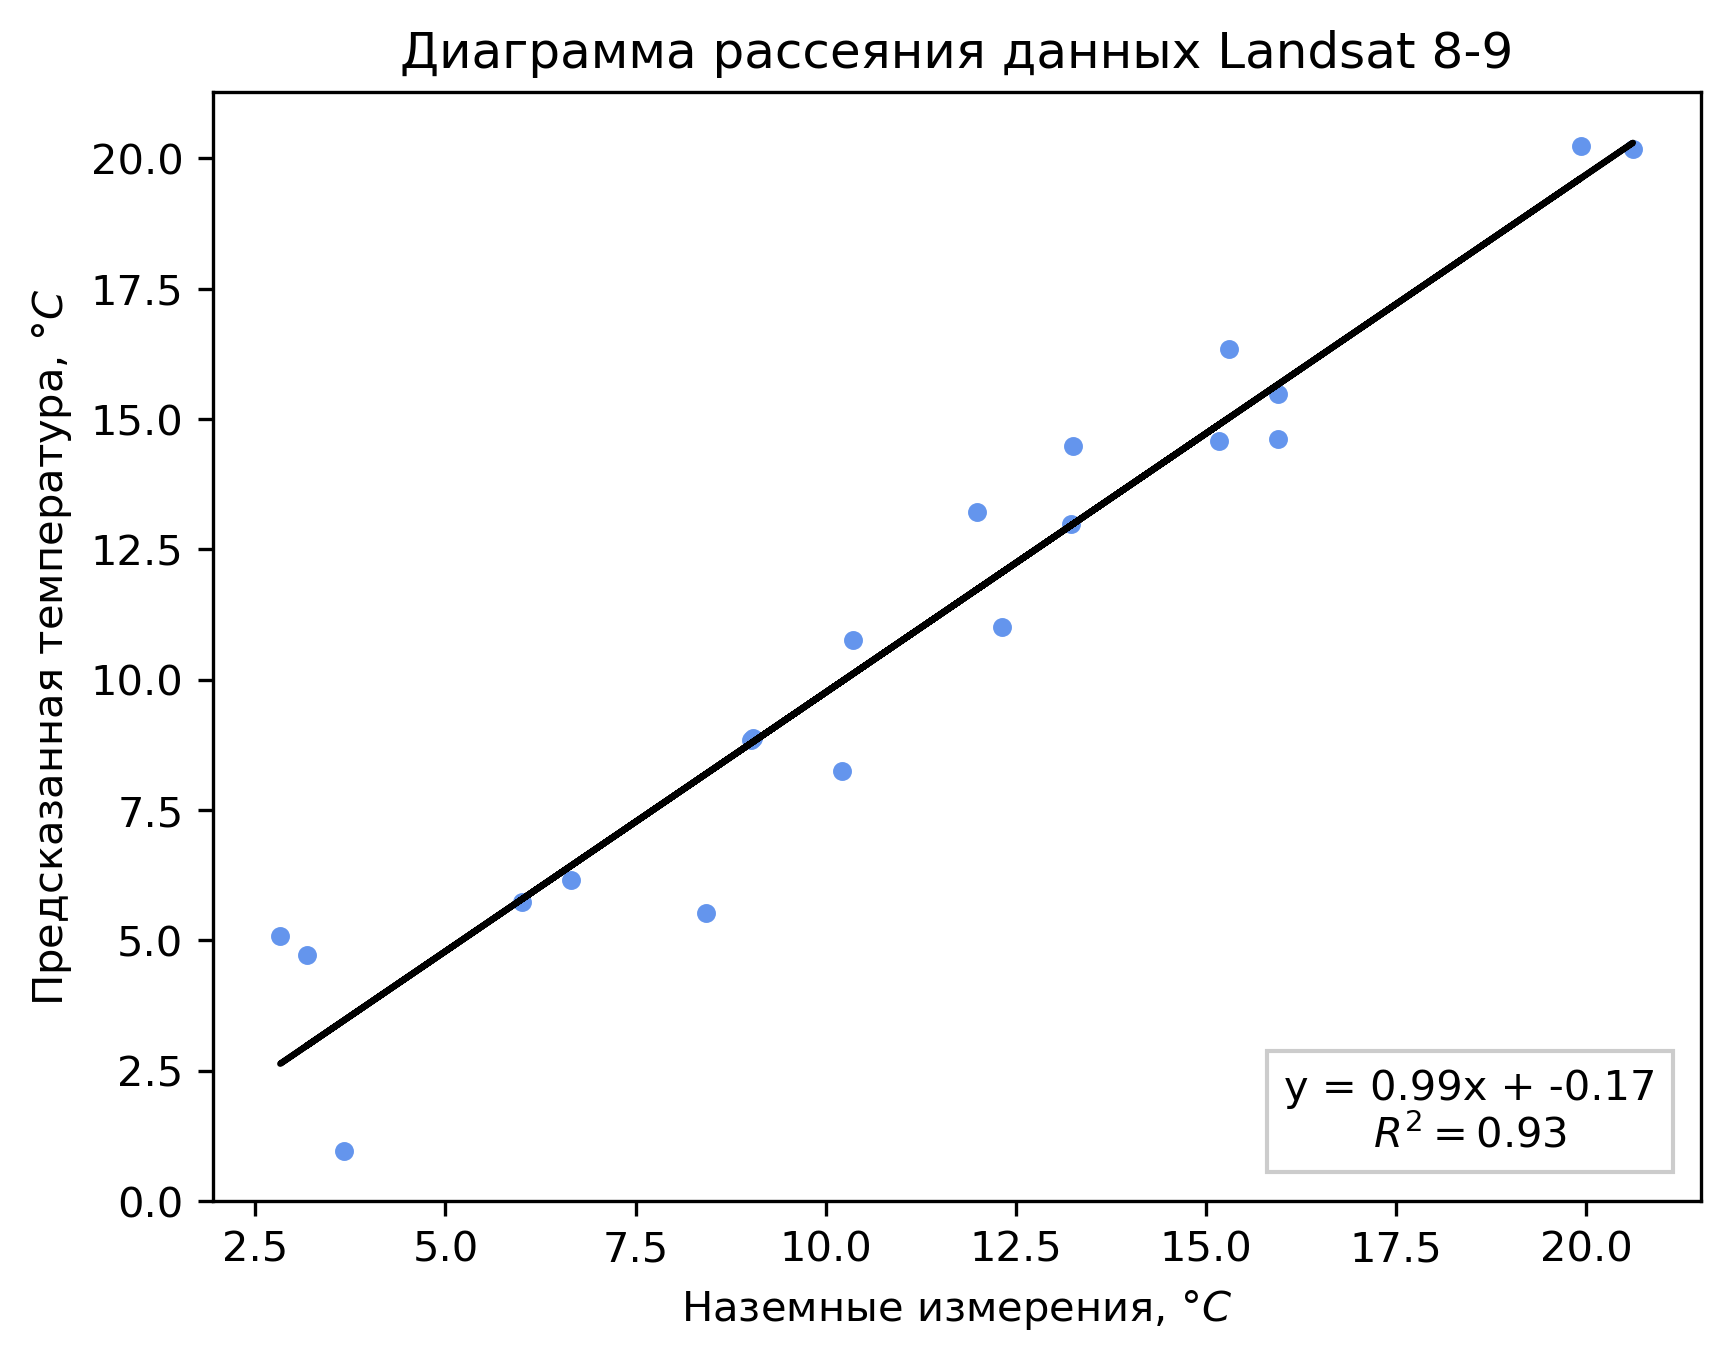

In [139]:
plot_validation(landsat_in_situ, landsat_image, "Диаграмма рассеяния данных Landsat 8-9", "Линейная_регрессия/landsat_8-9.png", are_big_markers=True)

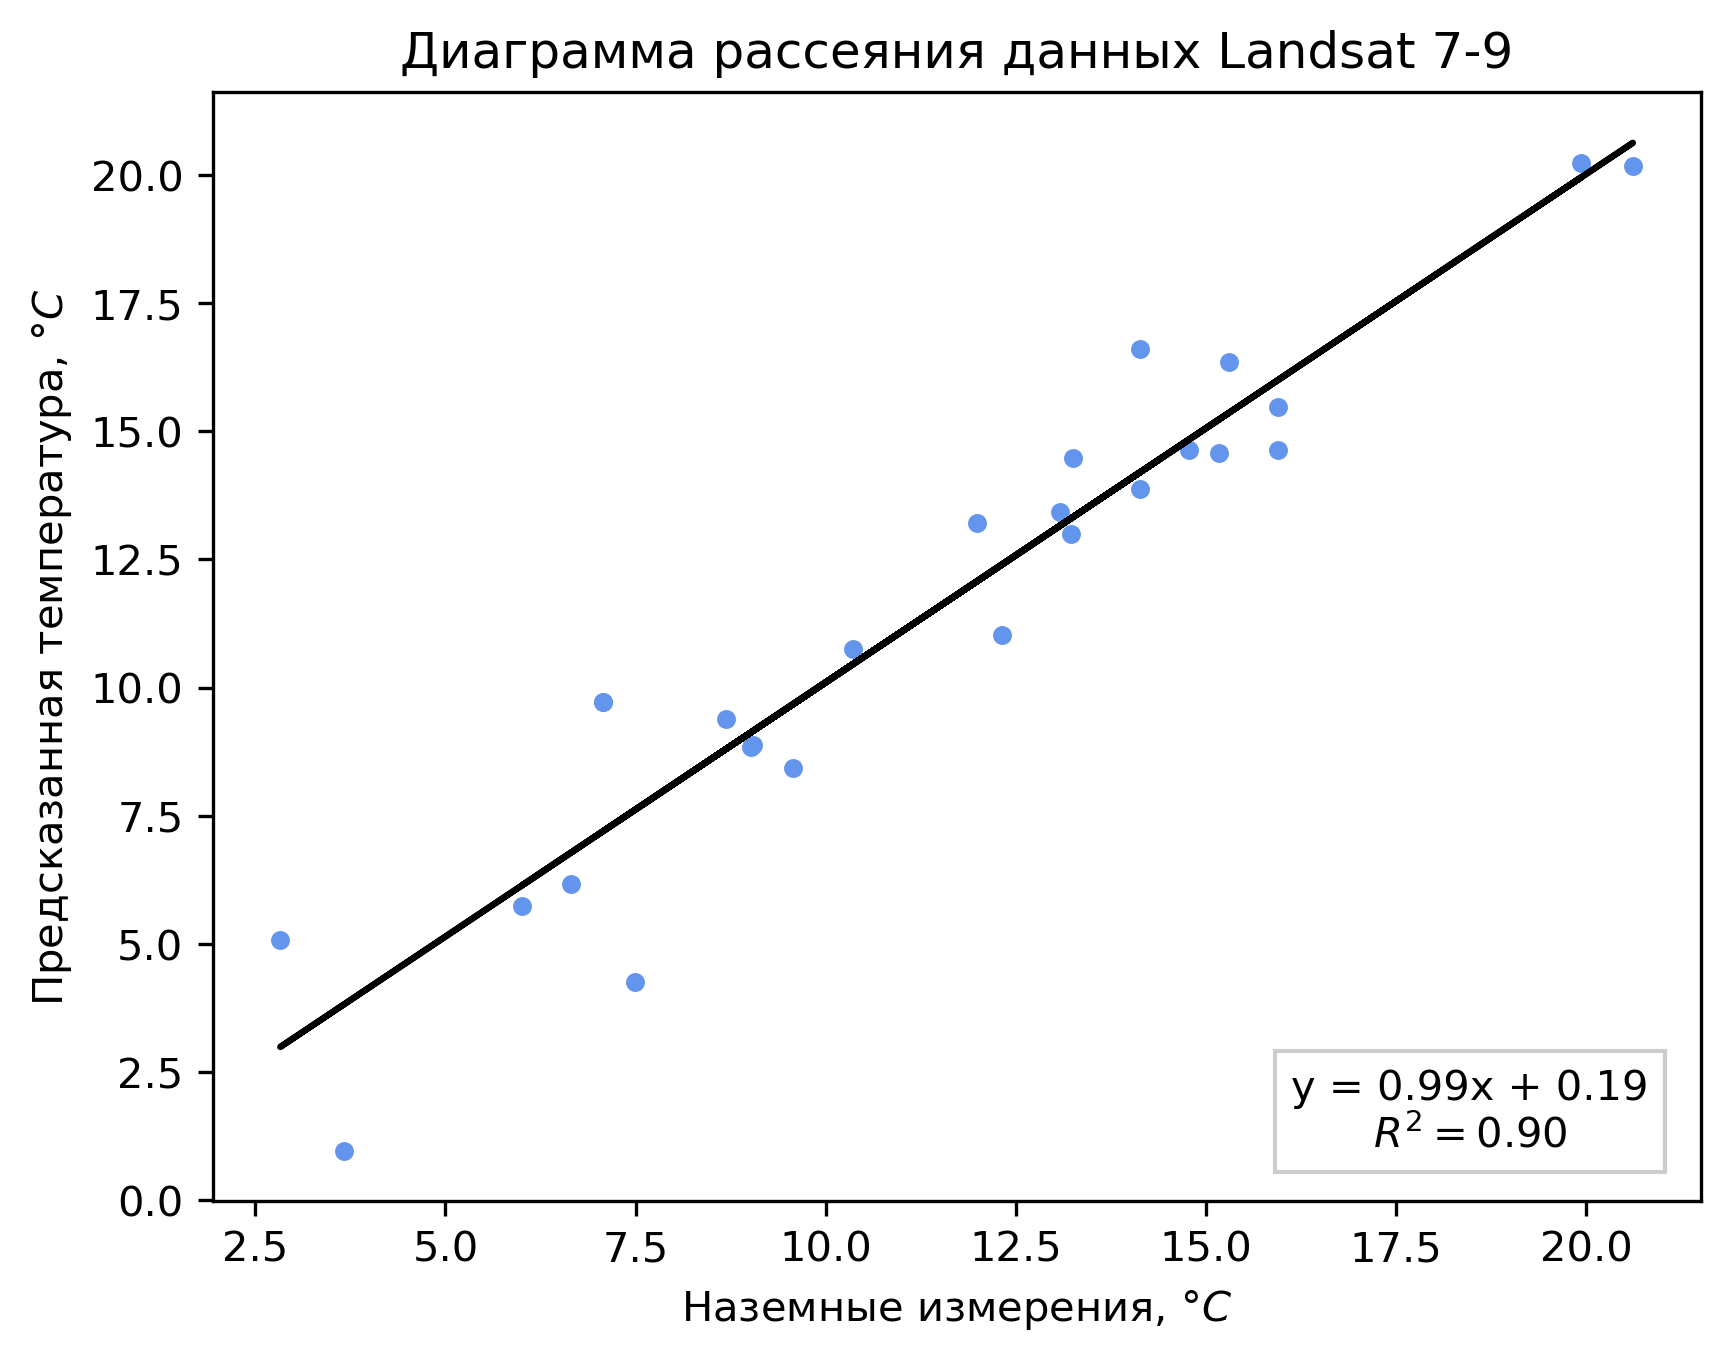

In [7]:
plot_validation(landsat_with7_in_situ, landsat_with7_image, "Диаграмма рассеяния данных Landsat 7-9", "Линейная_регрессия/landsat_7-9.png", are_big_markers=True)

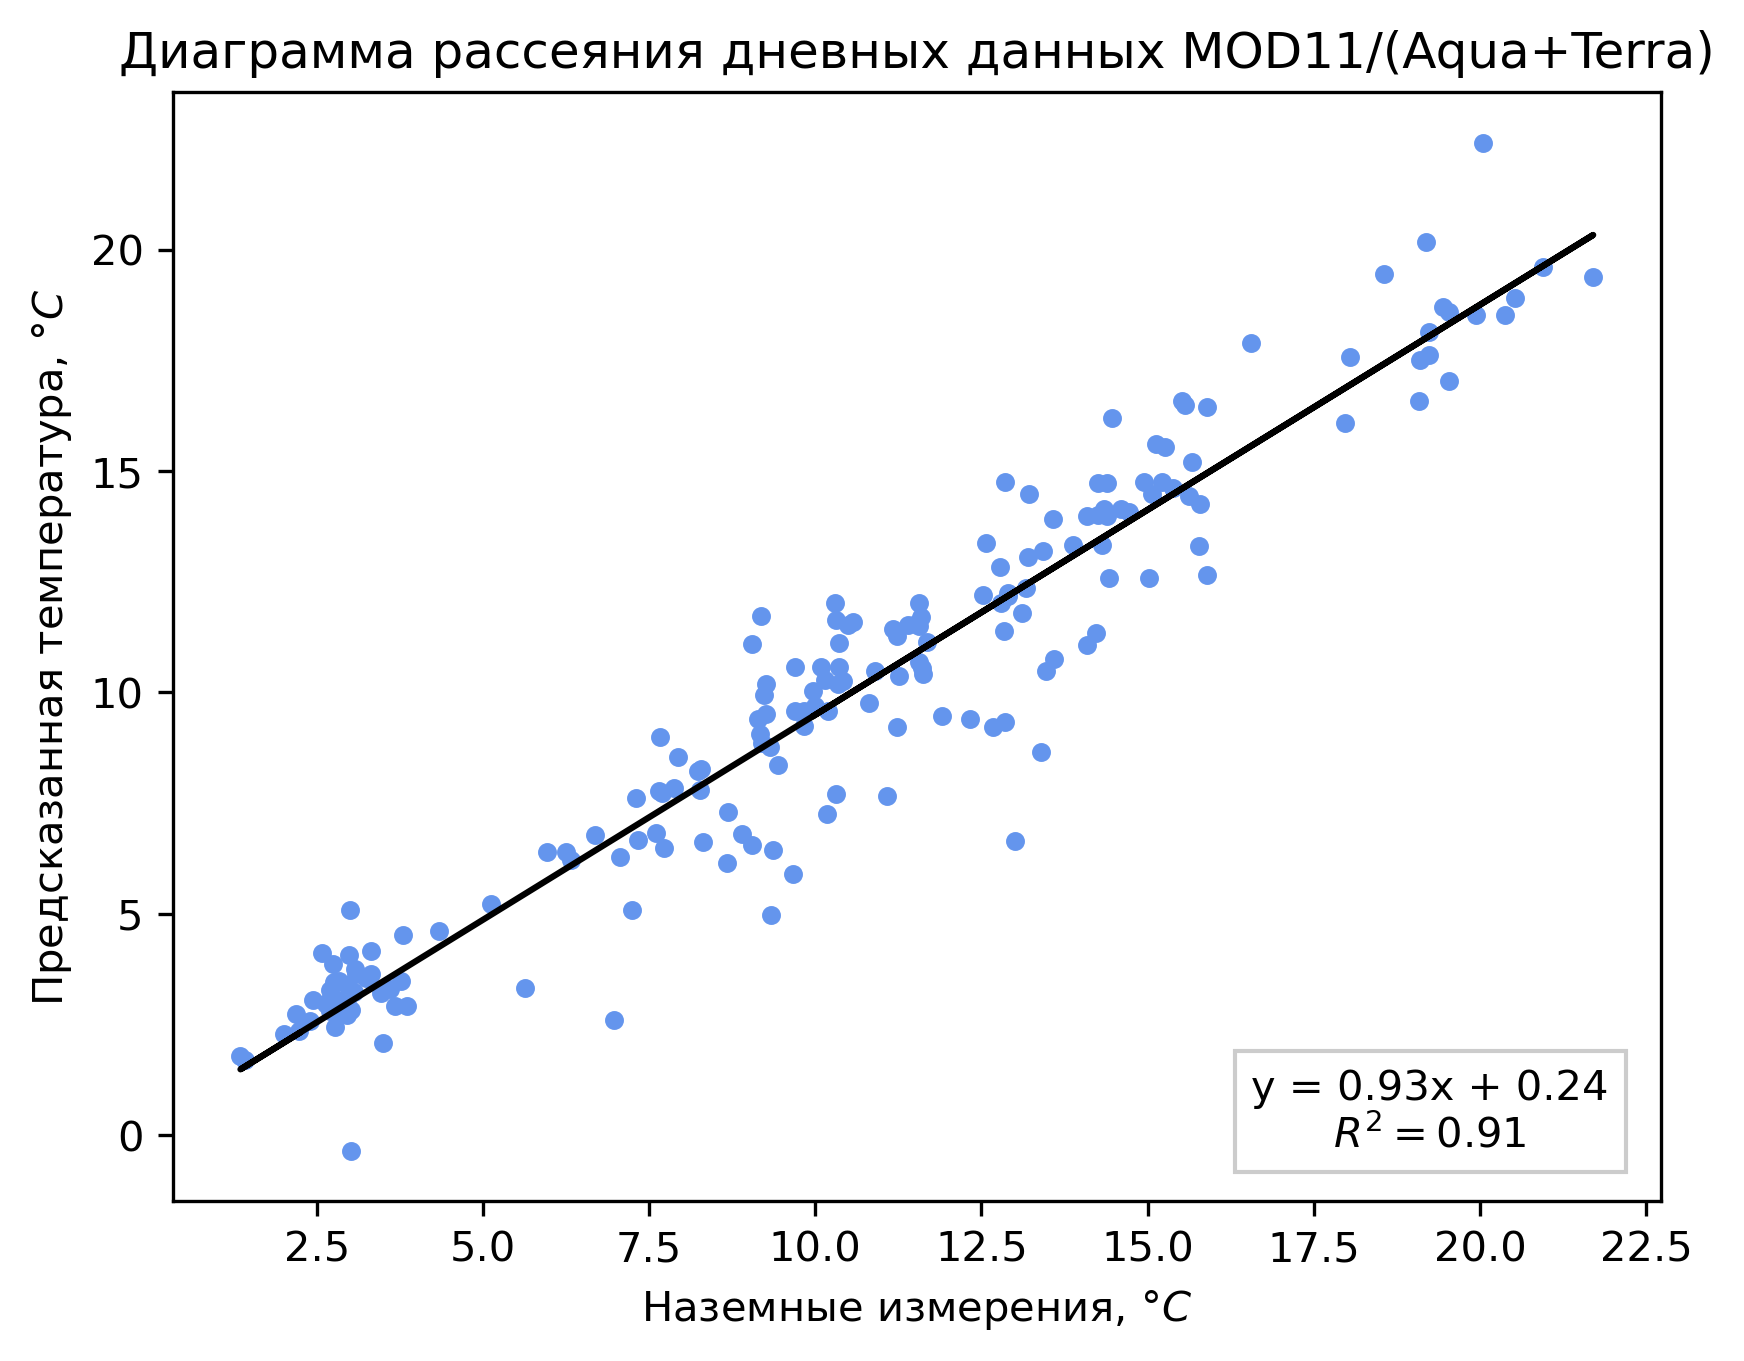

In [ ]:
plot_validation(mod11_day_in_situ, mod11_day_image, "Диаграмма рассеяния дневных данных MOD11A1+MYD11A1", "Линейная_регрессия/mod11_day.png", are_big_markers=True)

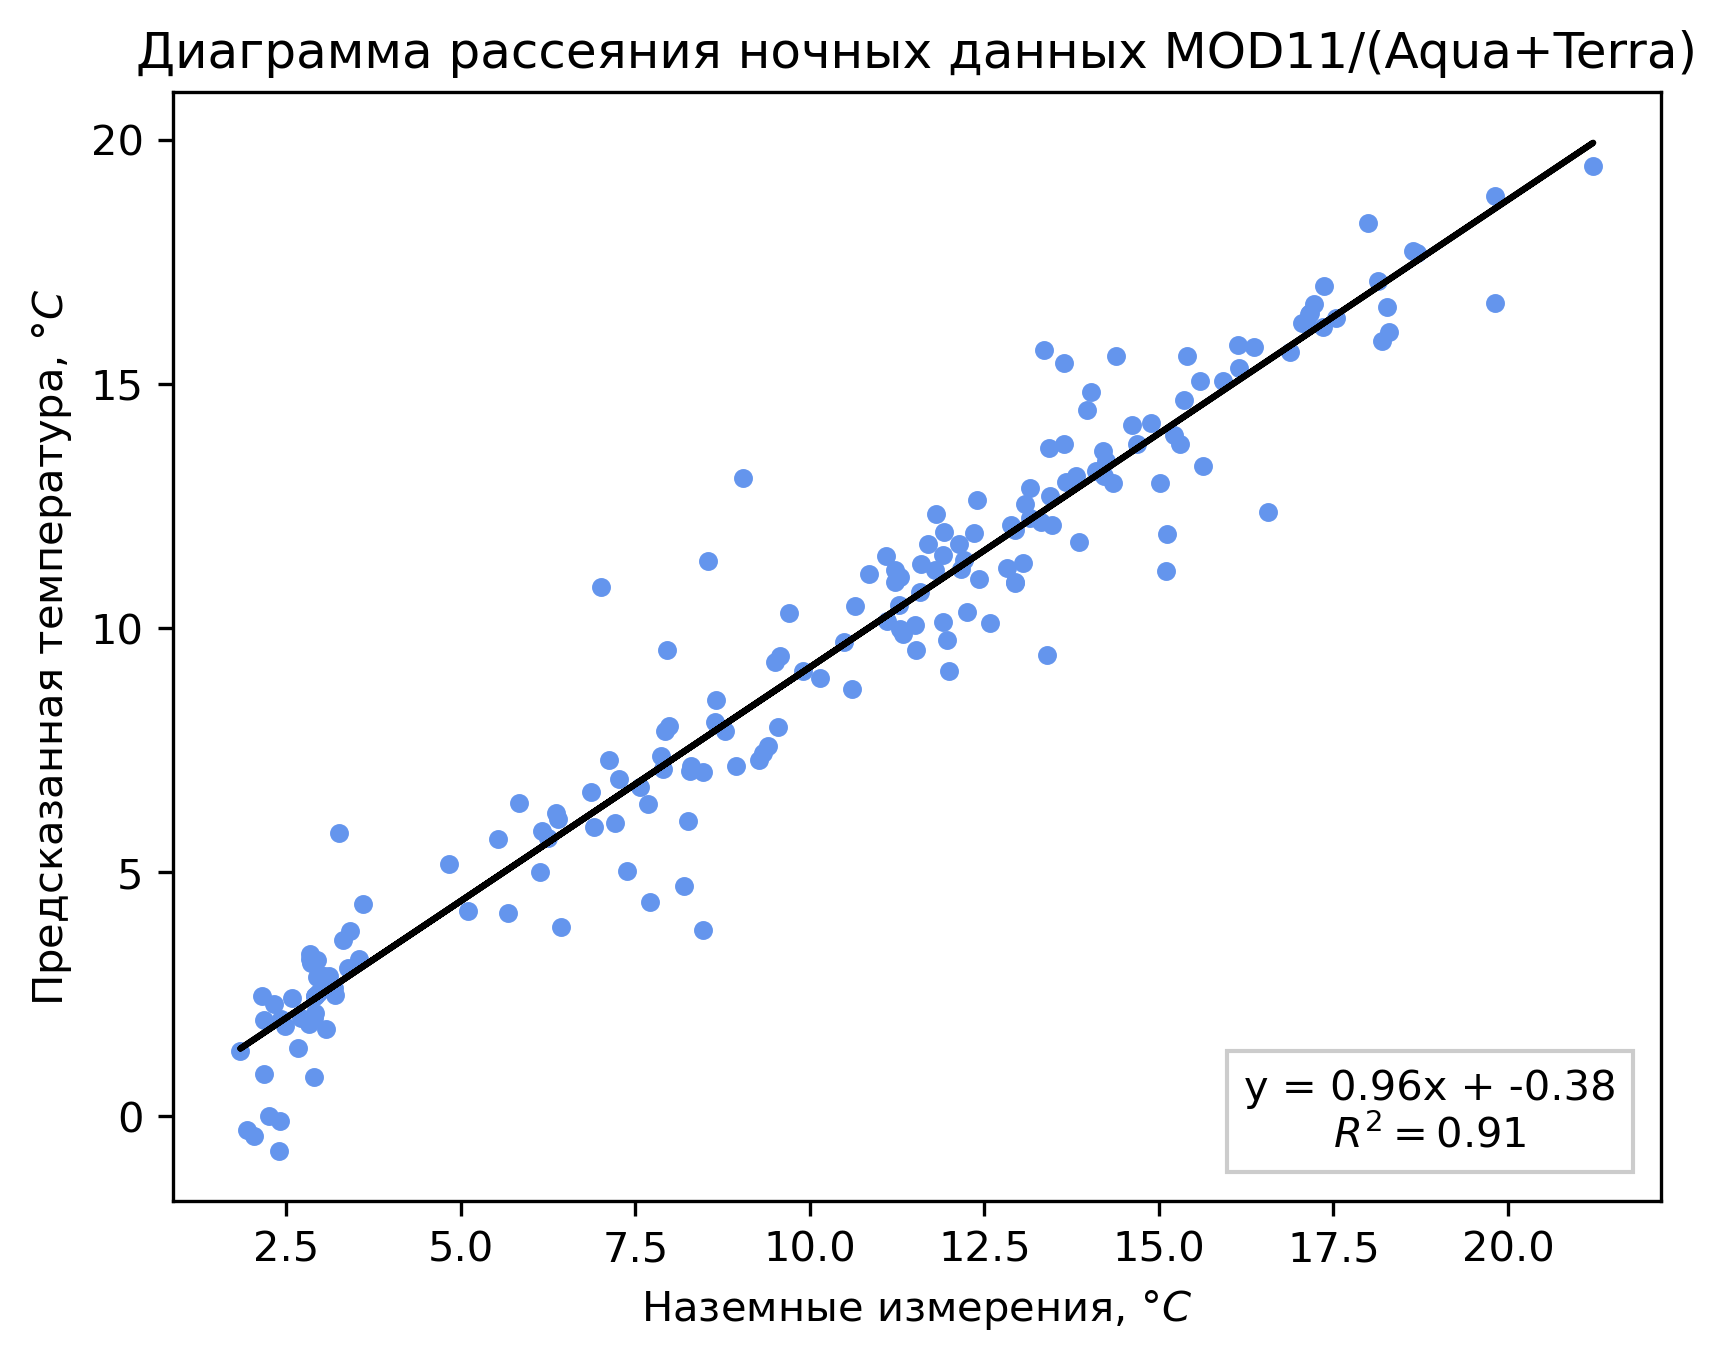

In [ ]:
plot_validation(mod11_night_in_situ, mod11_night_image, "Диаграмма рассеяния ночных данных MOD11A1+MYD11A1", "Линейная_регрессия/mod11_night.png", are_big_markers=True)

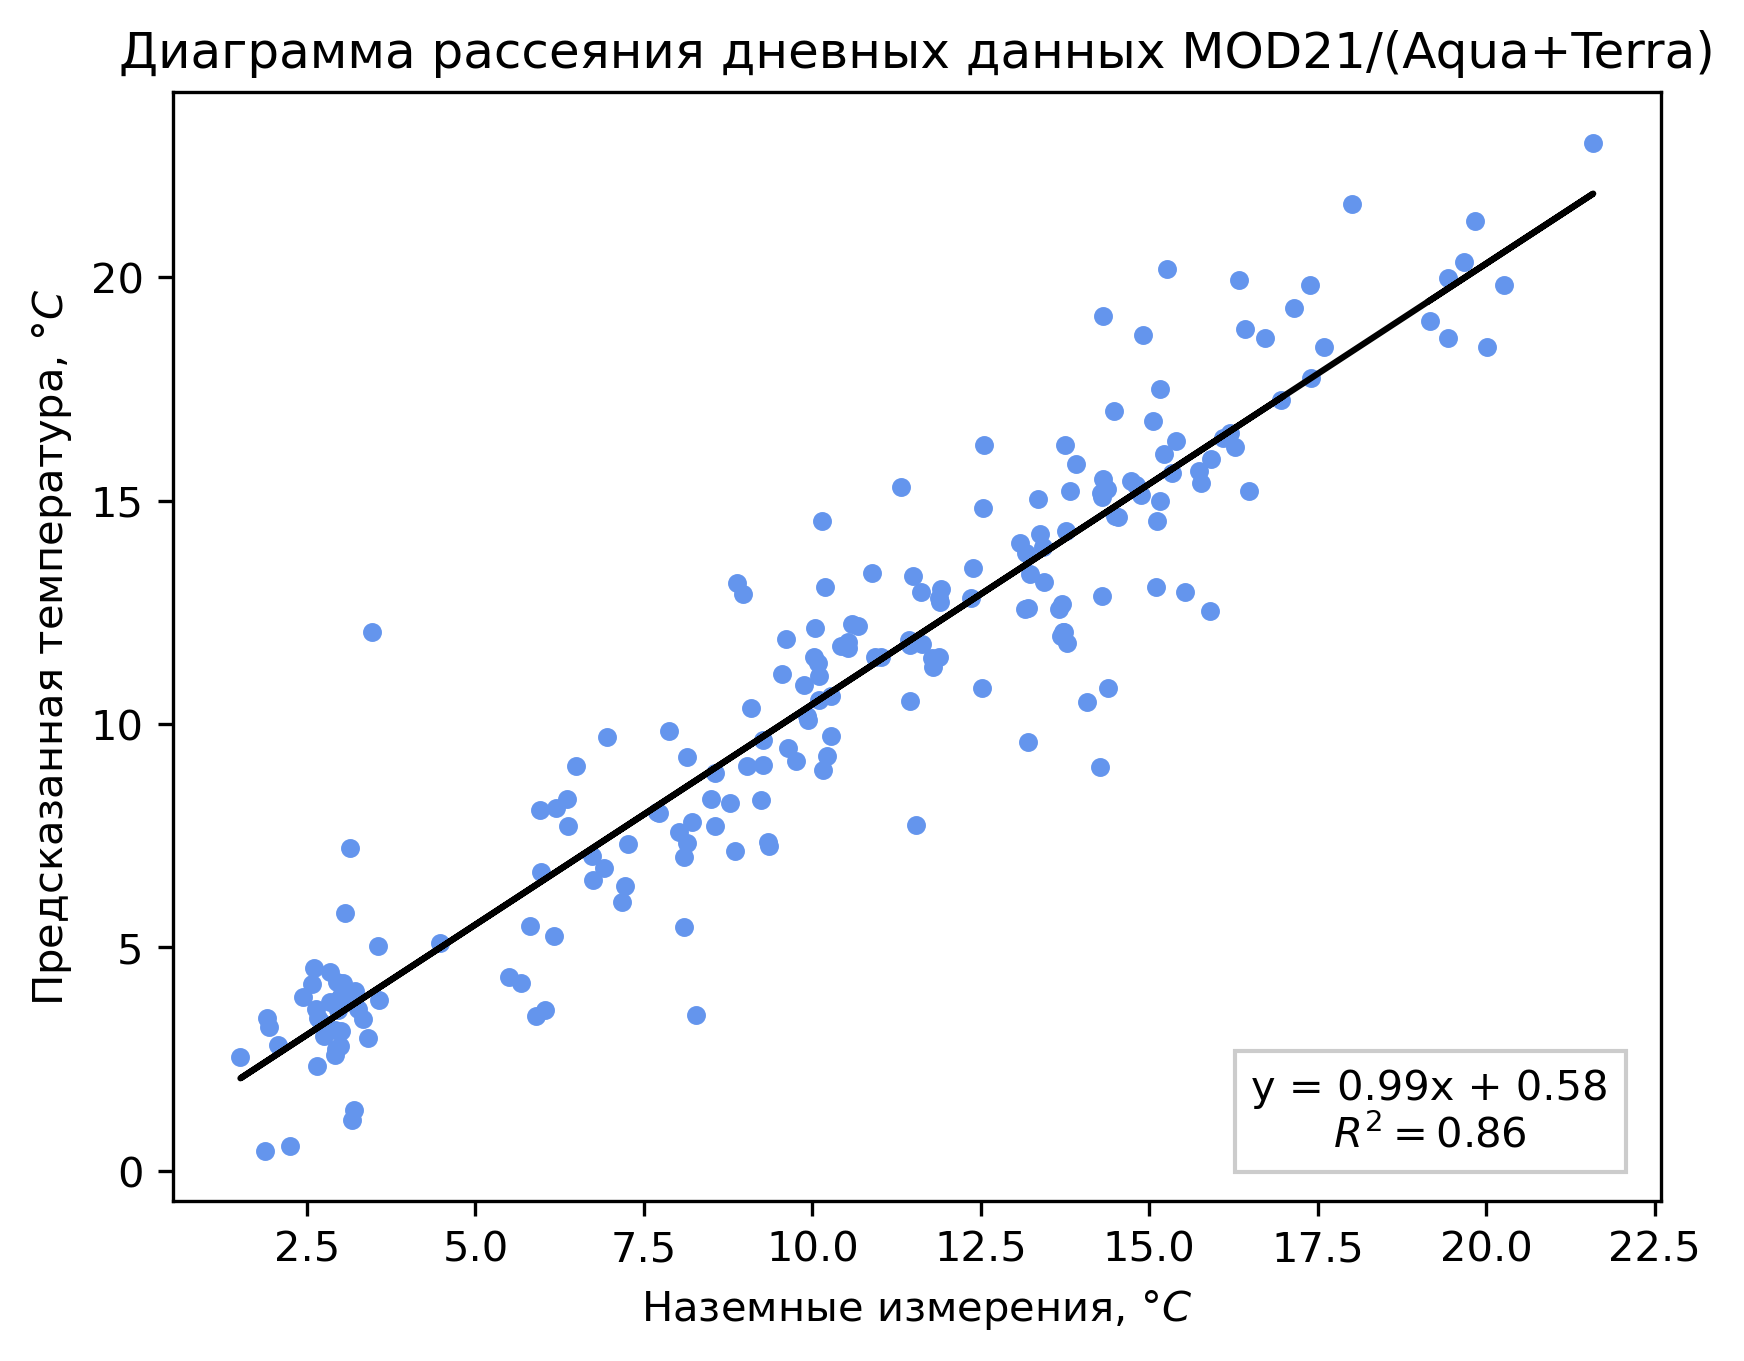

In [ ]:
plot_validation(mod21_day_in_situ, mod21_day_image, "Диаграмма рассеяния дневных данных MOD21C1+MYD21C1", "Линейная_регрессия/mod21_day.png", are_big_markers=True)

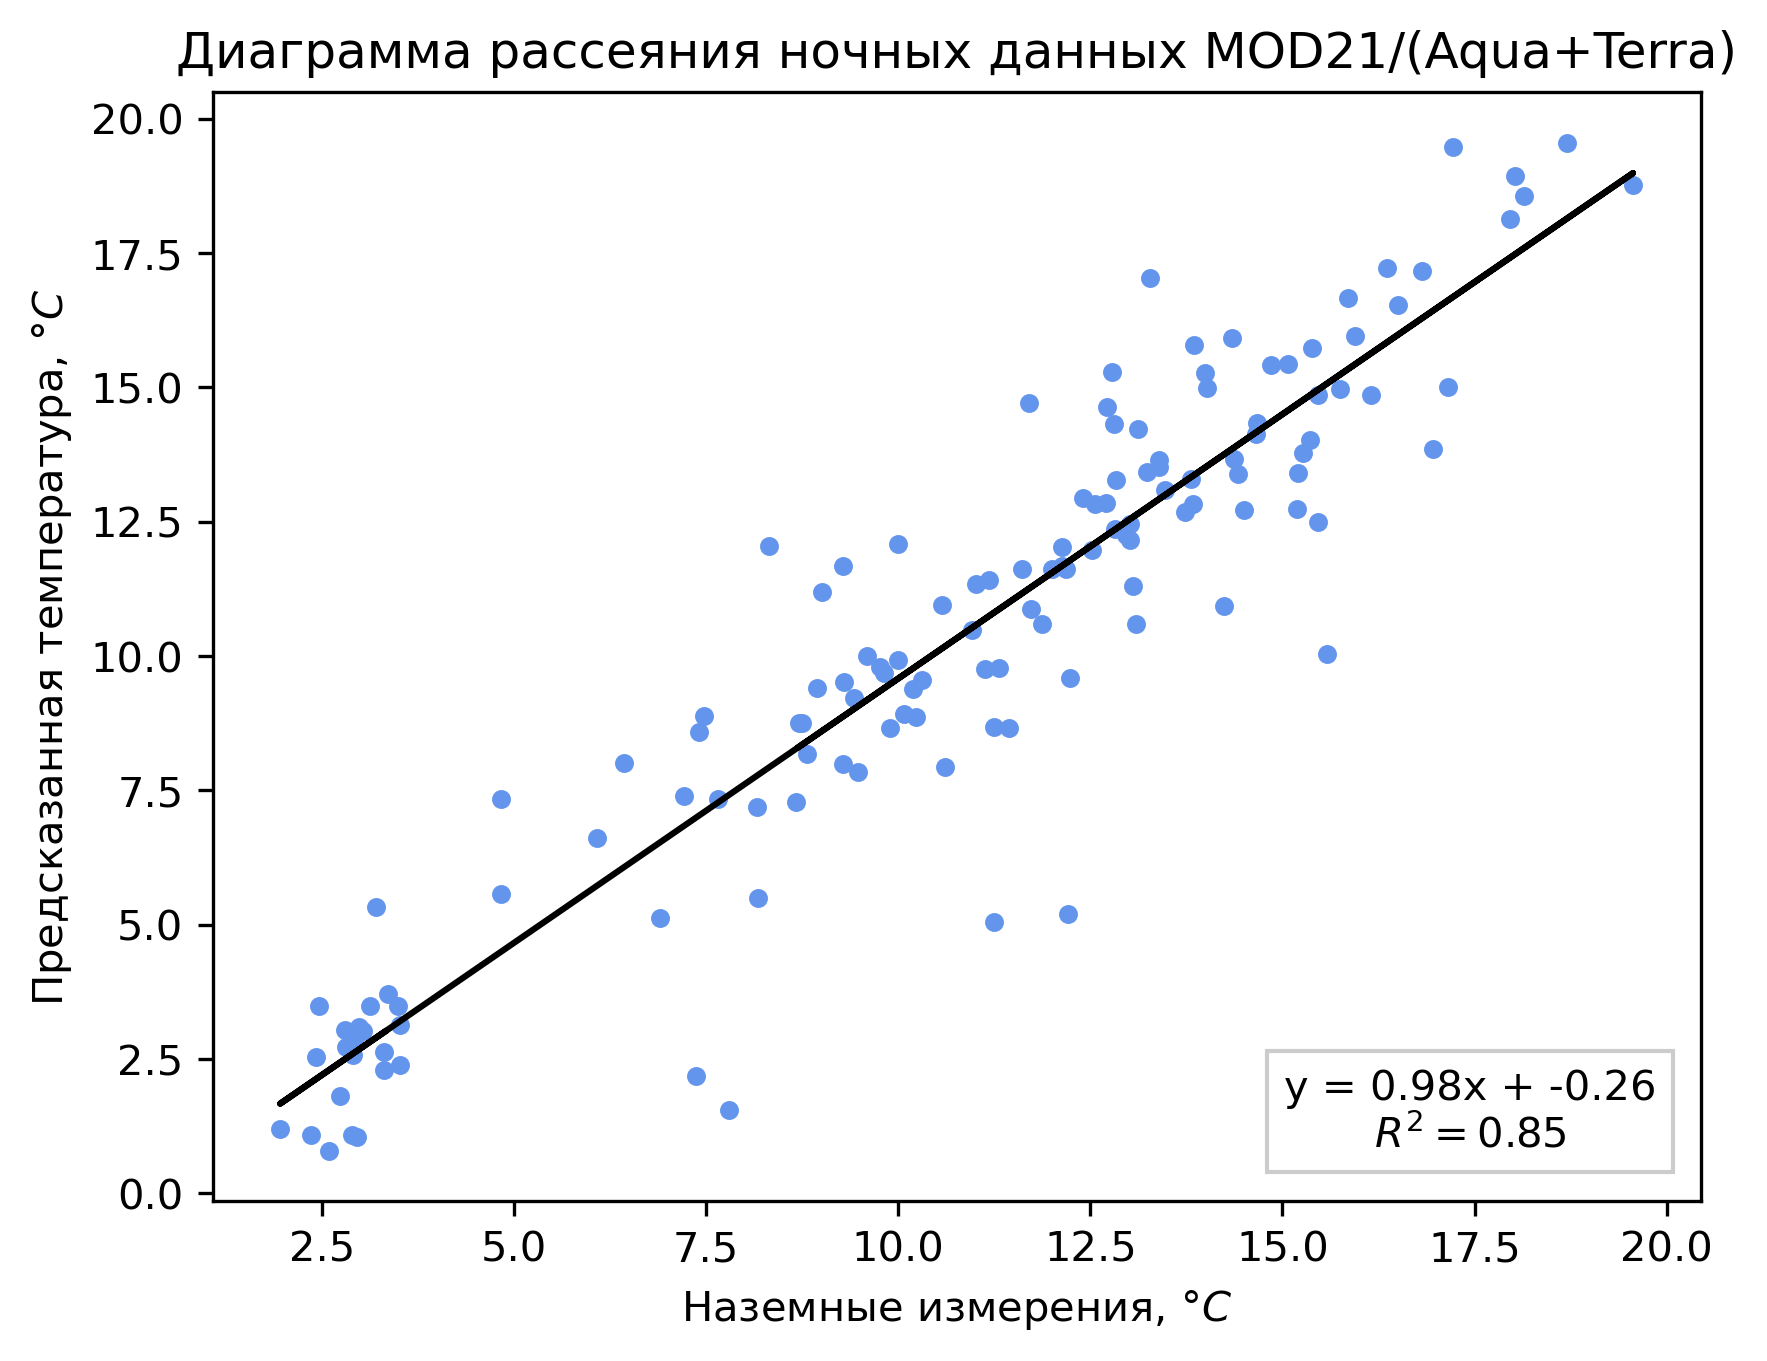

In [ ]:
plot_validation(mod21_night_in_situ, mod21_night_image, "Диаграмма рассеяния ночных данных MOD21C1+MYD21C1", "Линейная_регрессия/mod21_night.png", are_big_markers=True)

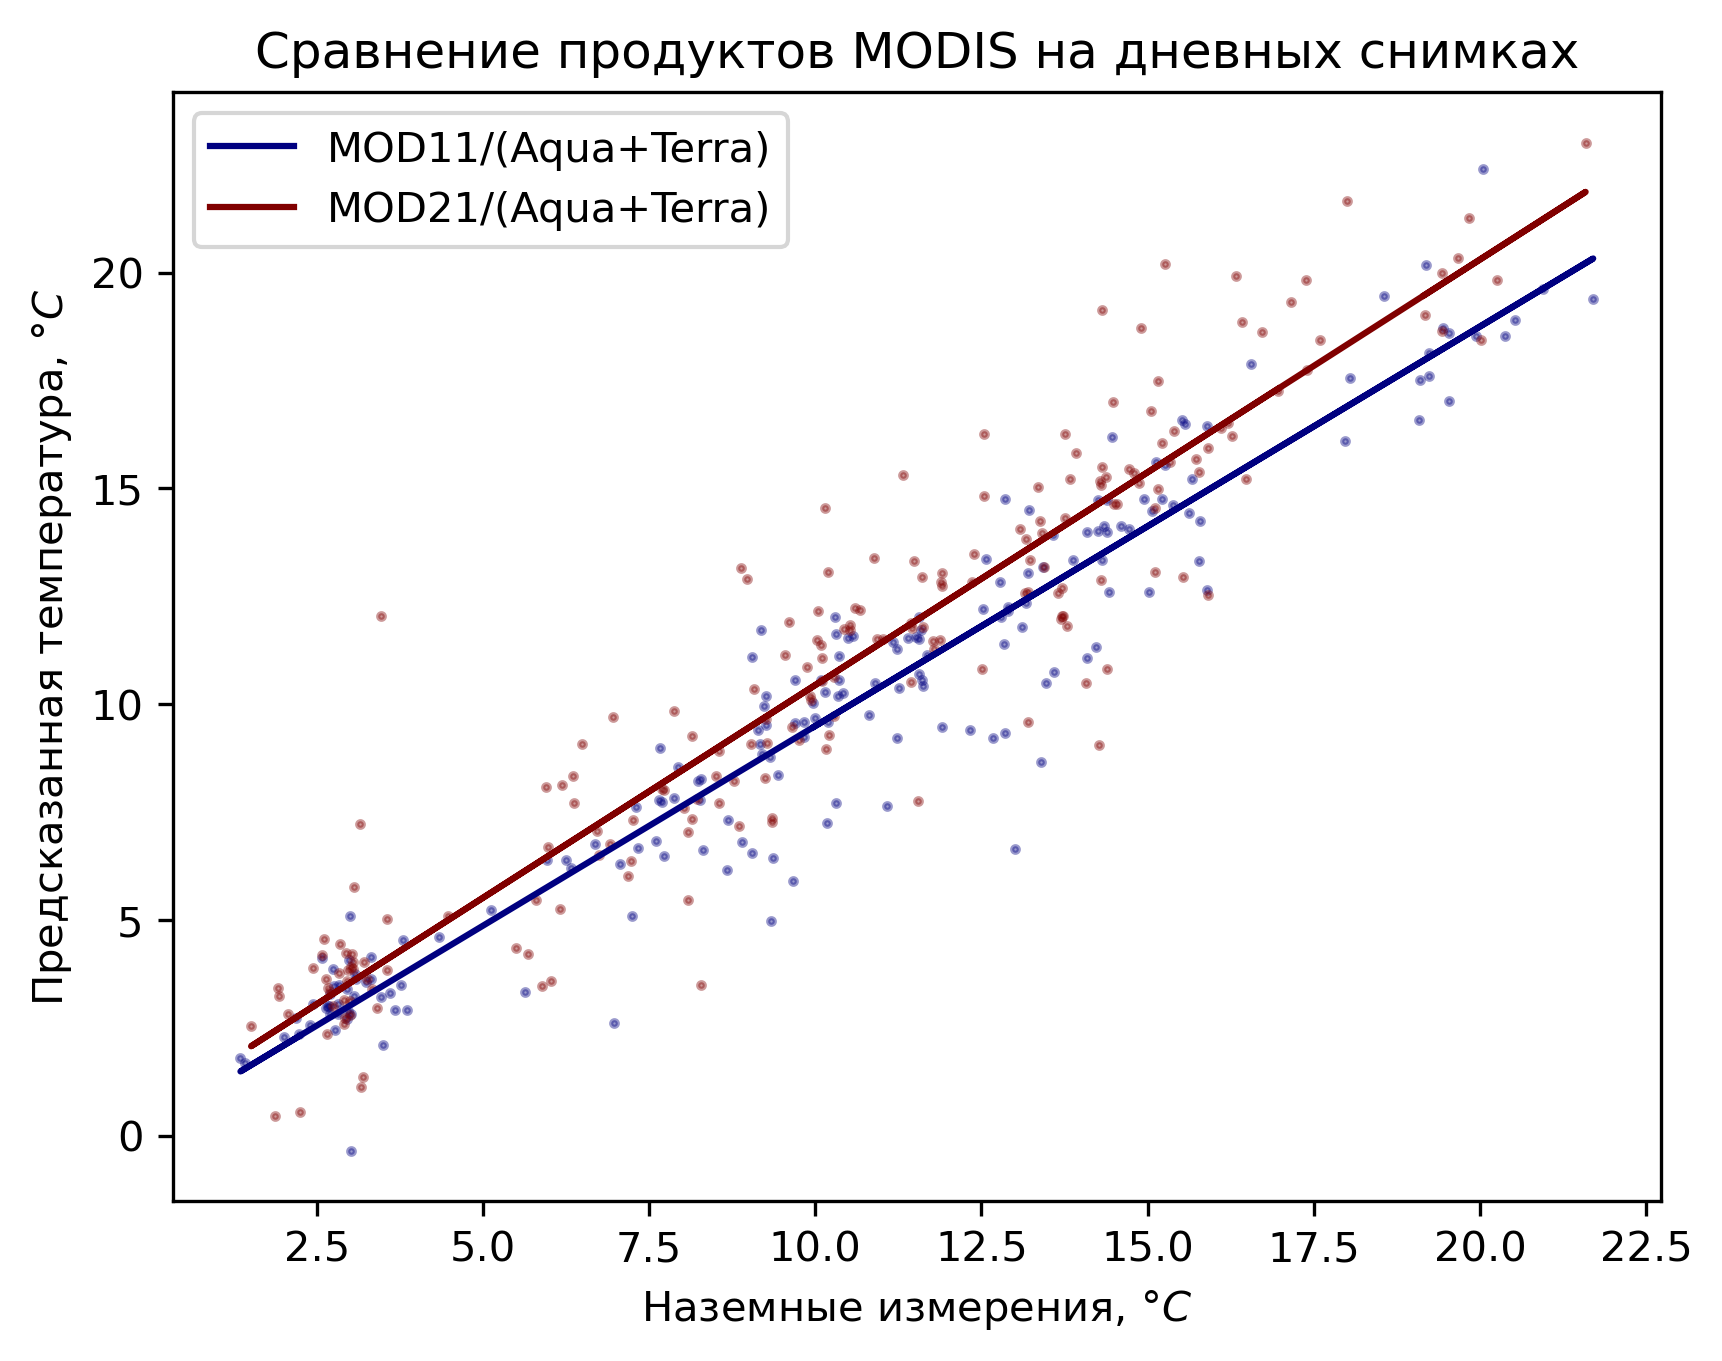

In [ ]:
plot_validation_multiple([mod11_day_in_situ, mod21_day_in_situ], [mod11_day_image, mod21_day_image], two_colors, ["MOD11A1+MYD11A1", "MOD21C1+MYD21C1"], "Сравнение продуктов MODIS LST на дневных снимках", "Линейная_регрессия/modis_comparison_day.png")

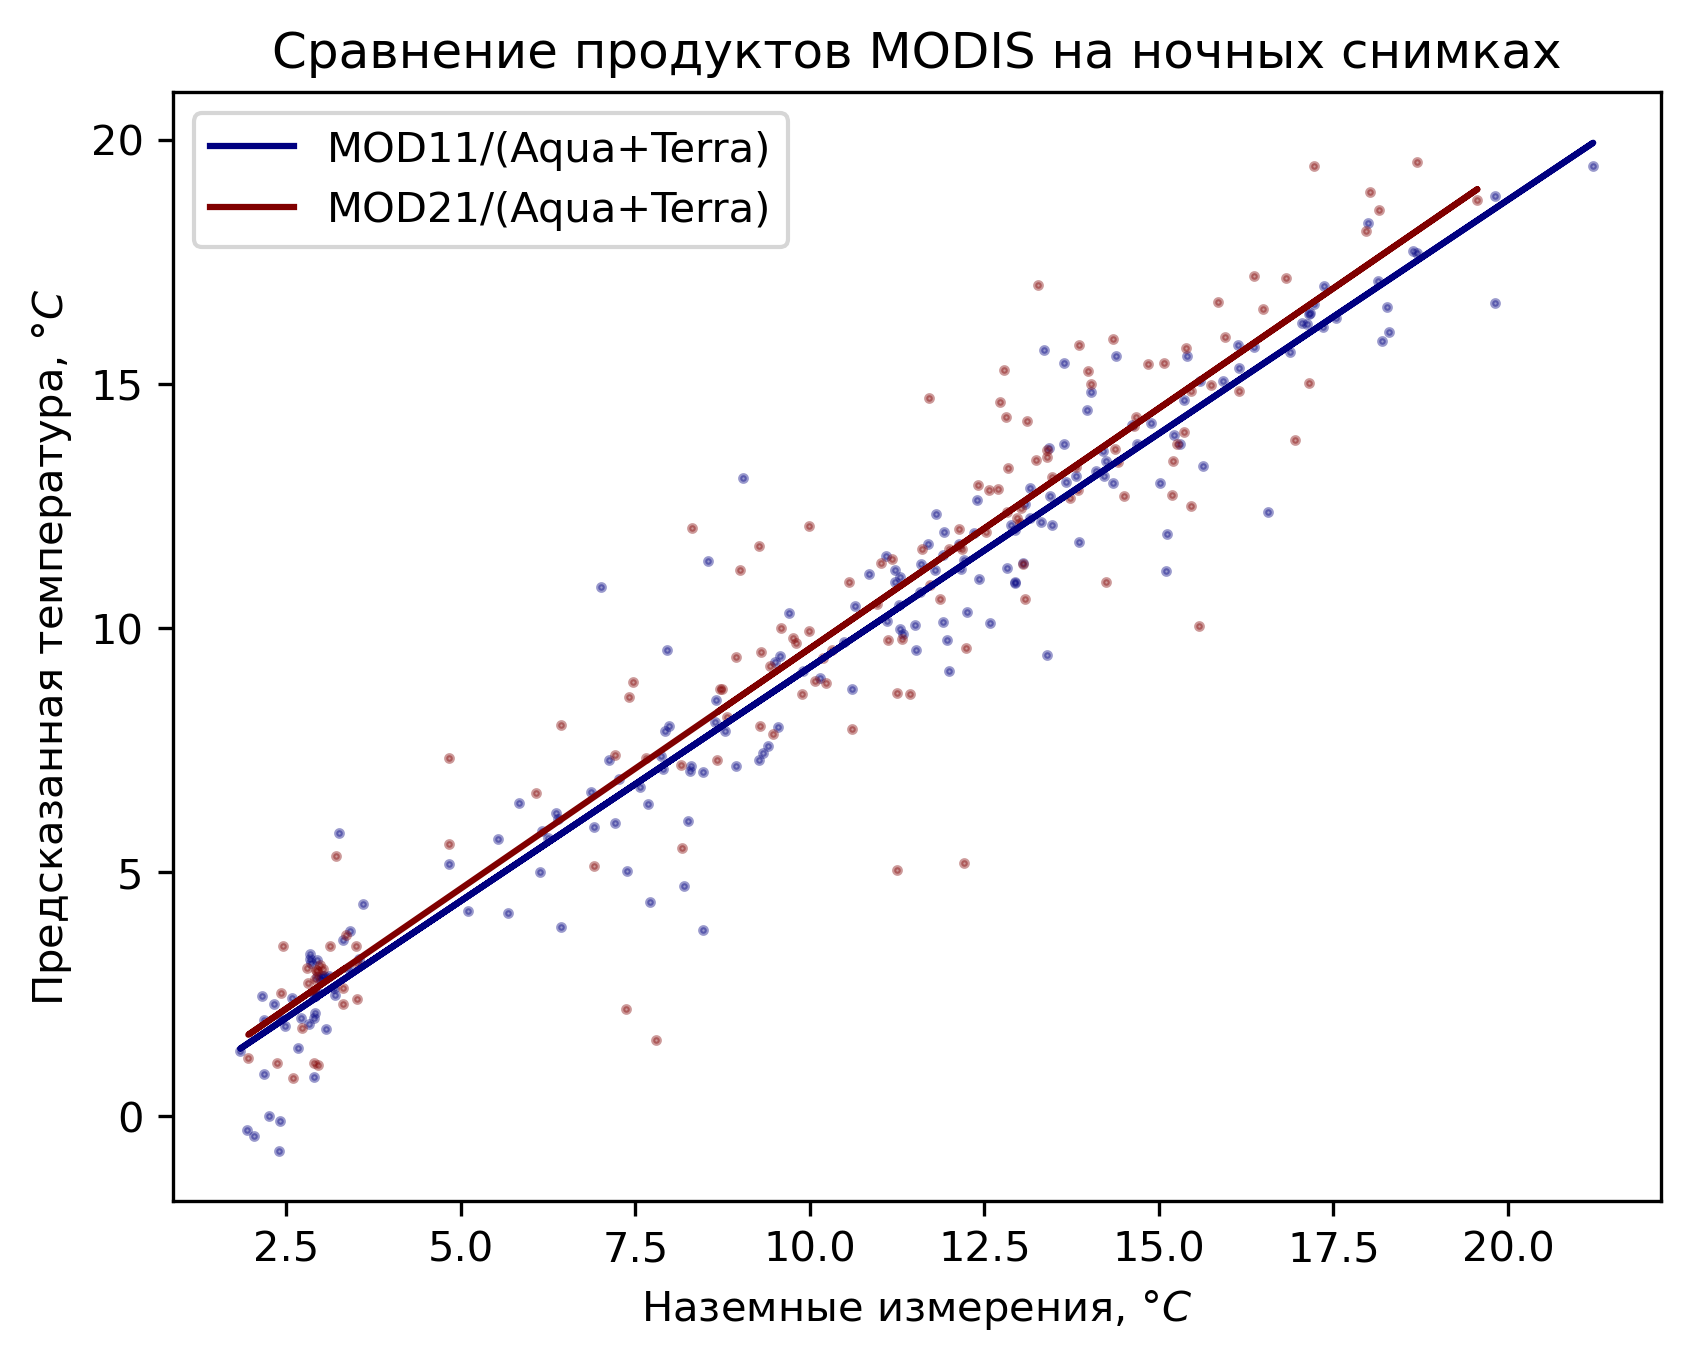

In [ ]:
plot_validation_multiple([mod11_night_in_situ, mod21_night_in_situ], [mod11_night_image, mod21_night_image], two_colors, ["MOD11A1+MYD11A1", "MOD21C1+MYD21C1"], "Сравнение продуктов MODIS на ночных снимках", "Линейная_регрессия/modis_comparison_night.png")